In [1]:
import matplotlib.pyplot as plt
import json

sgd1 = json.load(open("scores/epoch_scores_fista/SGD_1.json",'r'))
sgd3 = json.load(open("scores/epoch_scores_fista/SGD_3.json",'r'))
sgd5 = json.load(open("scores/epoch_scores_fista/SGD_5.json",'r'))
fista = json.load(open("epoch_scores/FISTA_fix_lr_0.0007.json", 'r'))
    
print(sgd1.keys())

dict_keys(['train_losses', 'test_losses', 'train_errs', 'test_errs', 'train_accs', 'test_acc', 'run_time', 'n_step'])


In [2]:
def add_acc_run_time(data):
    acc = []
    total = 0
    for rt in data['run_time']:
        total += rt
        acc.append(total)

    data['acc_run_time'] = acc

add_acc_run_time(sgd1)
add_acc_run_time(sgd3)
add_acc_run_time(sgd5)
add_acc_run_time(fista)

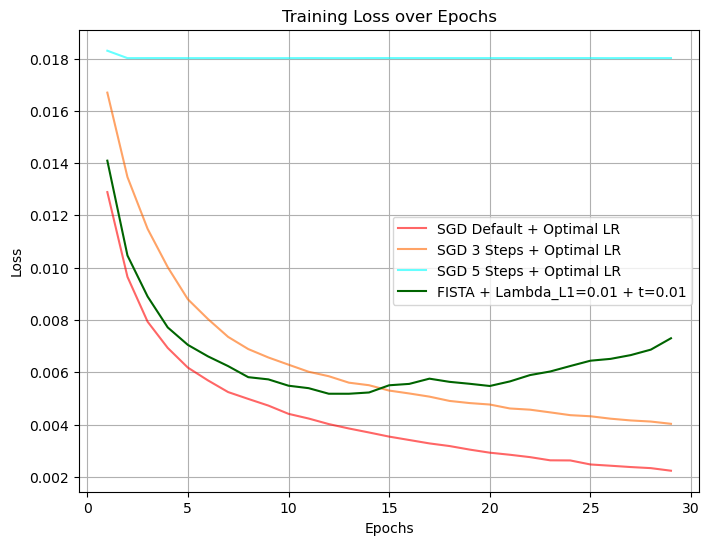

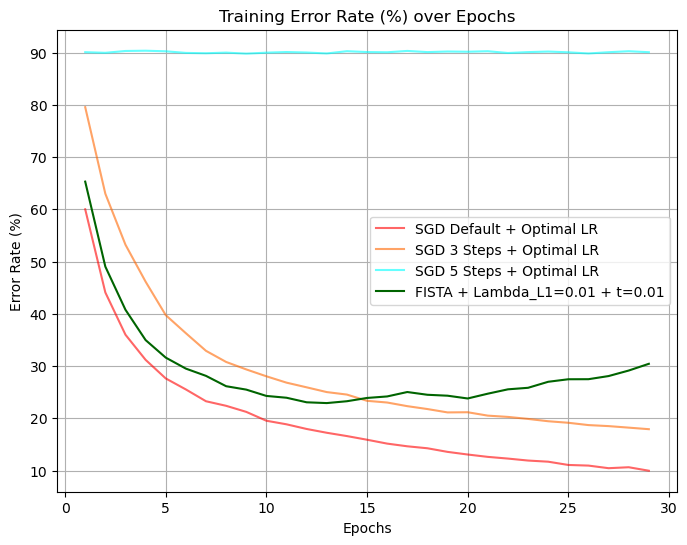

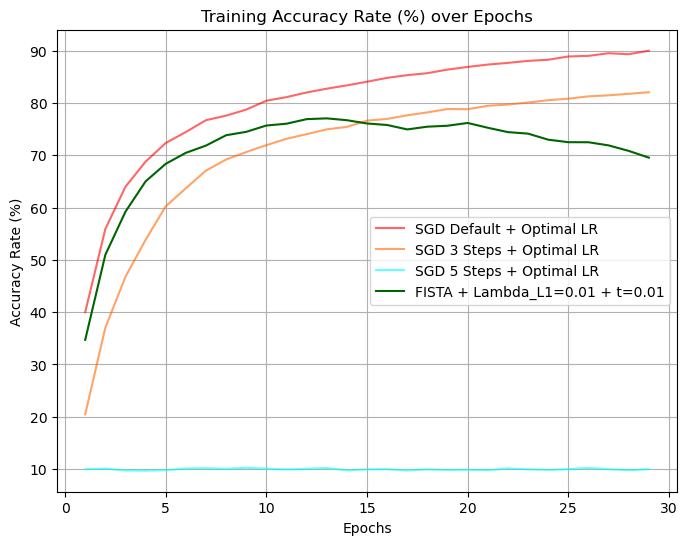

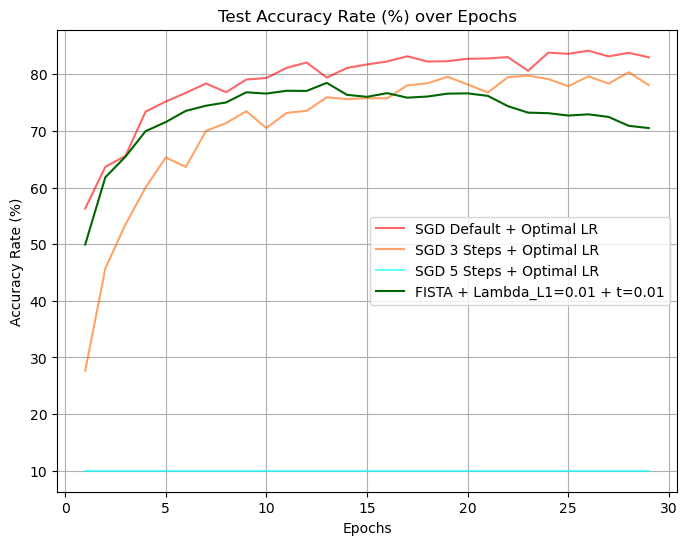

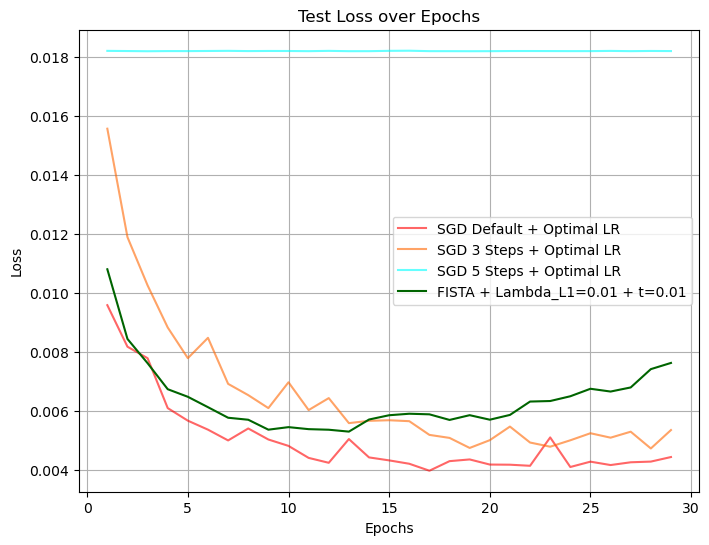

In [4]:
cold_to_hot_10 = [
    "#0000FF", "#0033FF", "#00FFFF", "#33FFCC", "#00FF00",
    "#66FF33", "#FFFF00", "#FFCC00", "#FF6600", "#FF0000"
]

def comp_plt(field, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sgd1[field])+1, 1), sgd1[field], label='SGD Default + Optimal LR', color='#FF0000', alpha=.6)
    plt.plot(range(1, len(sgd3[field])+1, 1), sgd3[field], label='SGD 3 Steps + Optimal LR', color='#FF6600', alpha=.6)
    plt.plot(range(1, len(sgd5[field])+1, 1), sgd5[field], label='SGD 5 Steps + Optimal LR', color='#00FFFF', alpha=.6)
    plt.plot(range(1, len(sgd5[field])+1, 1), fista[field][:len(sgd5[field])], 
             label='FISTA + Lambda_L1=0.01 + t=0.01', color='darkgreen')
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    
comp_plt(field='train_losses', xlabel='Epochs', ylabel='Loss', title='Training Loss over Epochs')
comp_plt(field='train_errs', xlabel='Epochs', ylabel='Error Rate (%)', title='Training Error Rate (%) over Epochs')
comp_plt(field='train_accs', xlabel='Epochs', ylabel='Accuracy Rate (%)', title='Training Accuracy Rate (%) over Epochs')

comp_plt(field='test_acc', xlabel='Epochs', ylabel='Accuracy Rate (%)', title='Test Accuracy Rate (%) over Epochs')
comp_plt(field='test_losses', xlabel='Epochs', ylabel='Loss', title='Test Loss over Epochs')

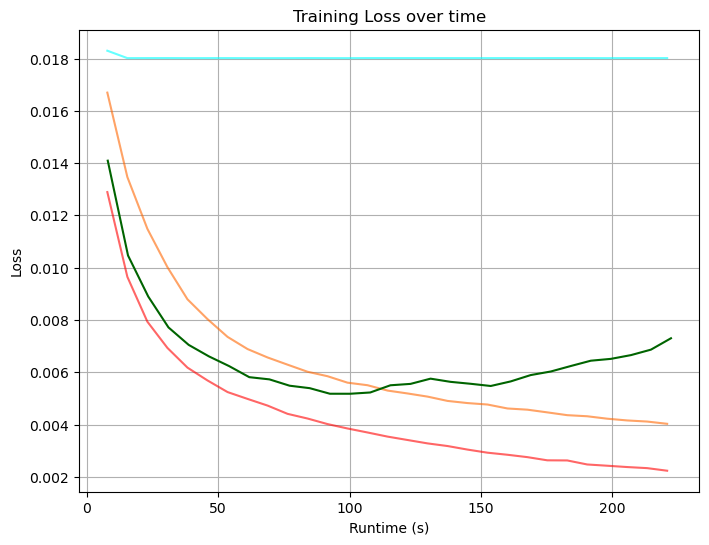

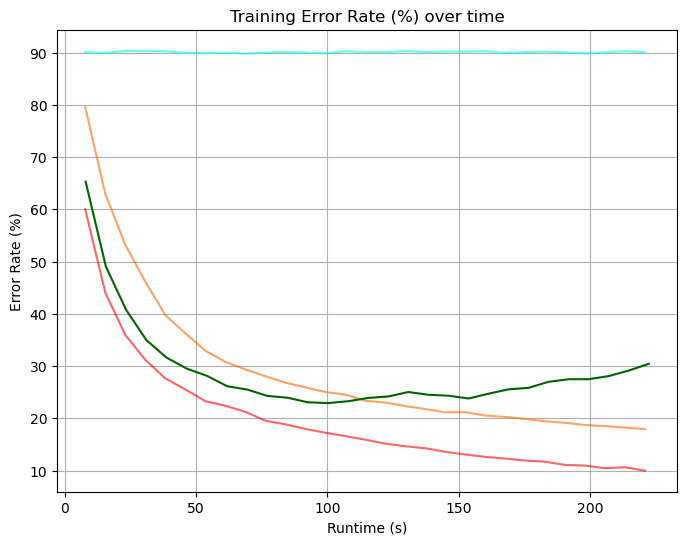

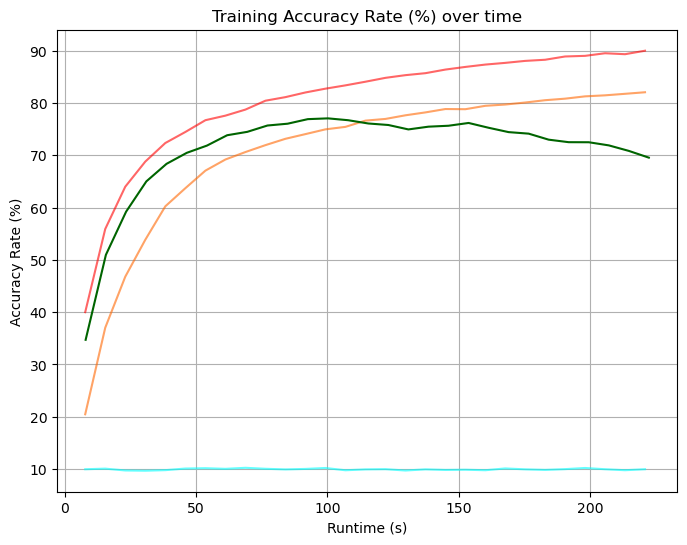

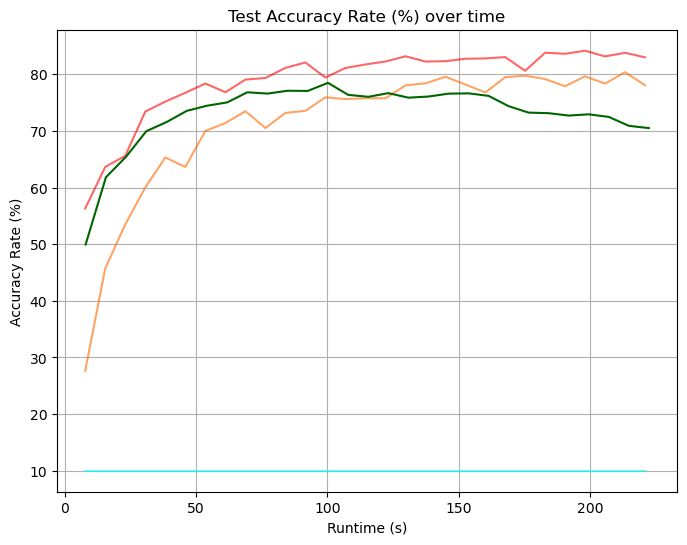

In [5]:
def comp_plt(field, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.plot(sgd1['acc_run_time'], sgd1[field], label='SGD Default + Optimal LR', color='#FF0000', alpha=.6)
    plt.plot(sgd1['acc_run_time'], sgd3[field], label='SGD 3 Steps + Optimal LR', color='#FF6600', alpha=.6)
    plt.plot(sgd1['acc_run_time'], sgd5[field], label='SGD 5 Steps + Optimal LR', color='#00FFFF', alpha=.6)
    plt.plot(fista['acc_run_time'][:len(sgd5[field])], fista[field][:len(sgd5[field])], 
             label='FISTA + Lambda_L1=0.01 + t=0.01', color='darkgreen', alpha=1)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.legend()
    plt.show()
    
comp_plt(field='train_losses', xlabel='Runtime (s)', ylabel='Loss', title='Training Loss over time')
comp_plt(field='train_errs', xlabel='Runtime (s)', ylabel='Error Rate (%)', title='Training Error Rate (%) over time')
comp_plt(field='train_accs', xlabel='Runtime (s)', ylabel='Accuracy Rate (%)', title='Training Accuracy Rate (%) over time')

comp_plt(field='test_acc', xlabel='Runtime (s)', ylabel='Accuracy Rate (%)', title='Test Accuracy Rate (%) over time')